In [30]:
import pandas as pd

data = pd.read_csv('../../dataset/dataset_pca.csv')
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Target
0,-0.314242,-0.205719,0.028824,-0.206659,0.012864,-0.874508,-0.387179,0.010646,Dropout
1,-0.470709,-0.329179,-0.884960,0.093840,-0.083021,0.226558,-0.106516,-0.184132,Graduate
2,-0.396169,0.580298,-0.717272,-0.092688,0.067955,-0.065536,0.096558,-0.204557,Dropout
3,-0.130125,0.273844,0.174658,0.023552,-0.576278,0.067090,0.072535,-0.123530,Graduate
4,-0.131716,0.229628,0.067836,0.505245,-0.335535,-0.094679,-0.105542,0.325822,Graduate
...,...,...,...,...,...,...,...,...,...
4419,-0.276222,-0.514504,0.105317,0.246347,0.491042,0.030594,0.111448,-0.049411,Graduate
4420,-0.528528,-0.238030,-0.820748,-0.271141,0.030093,0.218110,0.039184,-0.136250,Dropout
4421,0.814815,0.084677,-0.172297,0.317228,-0.250588,-0.060601,0.045802,0.100848,Dropout
4422,0.810934,0.170534,-0.080124,-0.148968,-0.501787,-0.070562,-0.011215,-0.056446,Graduate


In [31]:
# reshaping
y = data['Target']
x = data.drop(['Target'], axis=1)

## Dataset Balancing


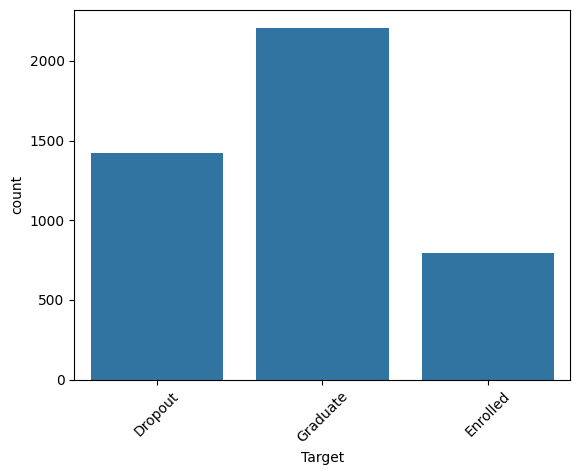

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=data)
plt.xticks(rotation=45)
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter

x, y = SMOTE().fit_resample(x, y)

sorted(Counter(y).items()) # resulting balanced dateframe

[('Dropout', 2209), ('Enrolled', 2209), ('Graduate', 2209)]

## Multi-class Logistic Regression


Splitting dataset into 80/20


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the feature set (scaling improves model performance for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model with multi-class handling
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

In [35]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.69      0.72       444
    Enrolled       0.53      0.62      0.57       439
    Graduate       0.65      0.60      0.63       443

    accuracy                           0.63      1326
   macro avg       0.64      0.63      0.64      1326
weighted avg       0.64      0.63      0.64      1326



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


-   Model accuracy is around 60%
-   High precision with Dropout class, but less with Enrolled and Graduate classes. Perhaps due to variables chosen?


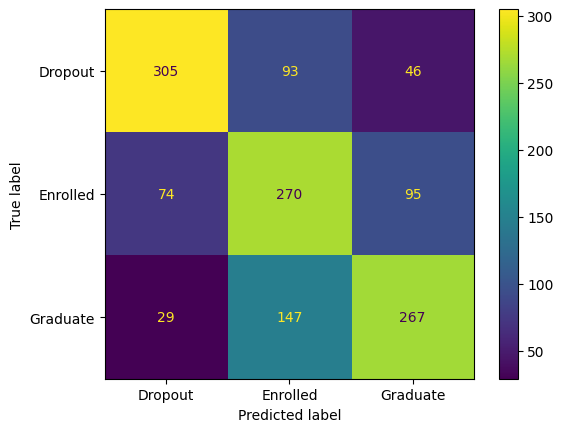

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Splitting dataset into 70/20/10


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Split data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)  # 40% for temp (validation + test)

# Split the temporary set into validation (2/3) and test (1/3) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)  # 50% of the temp for test

#  Standardisation and scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model with multi-class handling
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

In [38]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate model on the validation set
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Validation Classification Report:
              precision    recall  f1-score   support

     Dropout       0.77      0.67      0.72       248
    Enrolled       0.48      0.56      0.51       210
    Graduate       0.59      0.57      0.58       205

    accuracy                           0.60       663
   macro avg       0.61      0.60      0.60       663
weighted avg       0.62      0.60      0.61       663



In [39]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate model on the test set
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Classification Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.69      0.71       433
    Enrolled       0.54      0.62      0.57       440
    Graduate       0.65      0.61      0.63       453

    accuracy                           0.64      1326
   macro avg       0.64      0.64      0.64      1326
weighted avg       0.64      0.64      0.64      1326



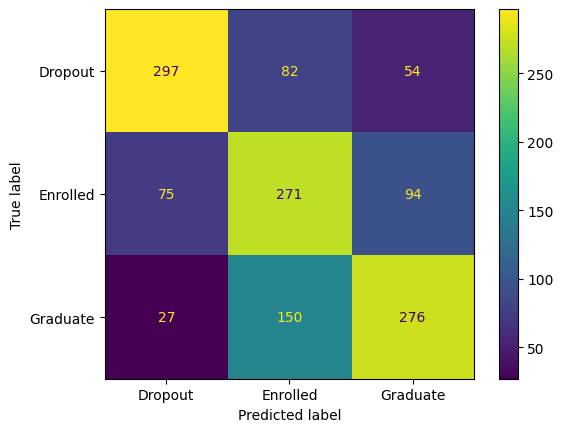

In [40]:
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()